<a href="https://colab.research.google.com/github/richardcpereira/projetos/blob/main/Avalia%C3%A7%C3%A3o_de_modelos_de_risco_voltados_%C3%A0_preven%C3%A7%C3%A3o_de_inadimpl%C3%AAncia_no_mercado_financeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

##**Avaliação de modelos de risco voltados à prevenção de inadimplência no mercado financeiro**##


**OBS: Para melhor visualização do projeto recomendo o visualizar dentro do ambiente do [Google Colab](https://colab.research.google.com/)**

---

# Avaliação de modelos de risco voltados à prevenção de inadimplência no mercado financeiro

Atualmente o nível de comprometimento da renda das famílias vem crescendo e a população vem utilizando novas linhas de crédito. Com isso grande parte dos segmentos de varejos, bancos e financeiras vem protegendo seus créditos através das análises de prevenção e fraudes e utilização de tecnologia moderna para cruzamento de dados, de modo a evitar uma aprovação de crédito arriscada.

Embora o processo de concessão de crédito dependa de diversos critérios, toda concessão estará exposta a algum risco. Por isso é fundamental mitigar a possíveis desvios que possam impactar diretamente nos resultados da companhia, como a falta do pagamento por parte do cliente nos prazos estabelecidos, pois isso é o que origina a inadimplência. Porém mesmo consciente que uma operação de crédito possui algum risco, isso não isenta a instituição em medir e acompanhar qual a métrica aceitável para manter a solidez da instituição e prevenir a inadimplência.

## Contextualização do Problema

Este projeto tem por objetivo de elaborar ou aprimorar um modelo de risco para rever se um determinado cliente tem alta probabilidade ou não de ser inadimplente em um determinado produto bancário.


O estudo será desenvolvido com base na análise de uma amostra de pessoas físicas cadastradas em uma instituição financeira, onde será utilizada metodologia com base nos conhecimentos adquiridos ao longo dos estudos de identificar relações importantes entre a variável dependente (sendo a probabilidade de inadimplência) com variáveis explicativas como o estado civil, o tempo de conta, o grau de instrução, a idade, o sexo, os valores pagos, a renda, entre outros. Dessa forma é esperado aplicação de um modelo de regressão logística que explique a dependência de uma variável em relação as outras.

# Atenção!

Caso utilize alguma frase ou ideia desse trabalho, lembre-se que o plágio é uma prática perigosa, que além de comprometer a credibilidade de um profissional, é um crime passível de punição, descrito no Código Penal Brasileiro e na Lei 9.610/1988.

Por isso, caso queira utilizar esse material fique a vontade de citar os crédito.

## Importar os Dados

Os dados que serão utilizados nesta análise estão disponíveis para download por meio [deste link](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0).

Este arquivo será importando para uma estrutura *DataFrame* utilizando a biblioteca `pandas` a fim de possibilitar sua manipulação e análise.

In [1]:
#1 importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, plot_confusion_matrix, accuracy_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# filtrar mensagens de warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#2 Importando os dados
df = pd.read_csv("http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0")

## Análise Exploratória dos Dados

Esta etapa consiste em entender como os dados estão estruturados, os tipos de dados que compõe o dataset e etc.

O primeiro passo é entendermos a dimensão dos dados no dataset.

In [3]:
#3 Imprimindos a dimensão das linhas e variáveis da base de dados
print("Quantidade de dados: ", df.shape[0])
print("Quantidade de variáveis: ", df.shape[1])

Quantidade de dados:  45000
Quantidade de variáveis:  43


O próximo passo é avaliarmos as 5 primeiras e últimas linhas do dataframe

In [4]:
#4 Imprimindo as 5 primeiras linhas
df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [5]:
#5 Imprimindo as 5 últimas linhas
df.tail()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
44995,696cb747-1159-0a29-6731-8c52c6c42f5d,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,280.0,96.379531,0.416693,103.667082,0.17,14766.42,...,730,"(-22.486891256430695, -44.909010639017616)",Facebook,768-5074915,73417.0,BR-GO,52148,"{'tags': ['n1', 'n7', 'n4', 'n0']}",Mozilla/5.0 (Linux; Android 6.0.1; SM-G920V Bu...,NaN
44996,92cd9b1a-9a8e-43ad-5d96-8e999128b472,False,smzX0nxh5QlePvtVf6EAeg==,vJyc9xom9v7hwFMPTIpmKw==,370.0,96.124977,0.692196,97.977973,0.27,NaN,...,28,"(-12.881449687799003, -46.43545330884514)",Waiting-list,772-3517810,26246.0,BR-RO,46084,"{'tags': ['n11', 'n5', 'n12']}",Mozilla/5.0 (X11; CrOS x86_64 8172.45.0) Apple...,NaN
44997,febdd174-cf18-0be1-feb8-38399dd67d9e,False,e4NYDor1NOw6XKGE60AWFw==,ky19q4V1ZqgL3jnHX0wKDw==,280.0,102.377780,0.530938,93.687747,0.30,NaN,...,940,"(-23.888982131800983, -50.645313285616645)",Waiting-list,334-9885724,101252.0,BR-SP,30570,"{'tags': ['dfa', 'c55', 'pro+aty']}",Mozilla/5.0 (Linux; Android 5.0.2; LG-V410/V41...,NaN
44998,a0a5a872-6165-b939-b711-37d045a0b5a8,True,smzX0nxh5QlePvtVf6EAeg==,6J1ZMTzN5GKHXnhM4J1JbA==,240.0,100.476090,0.214697,86.759074,0.37,NaN,...,459,"(-5.14769885524928, -37.98386842511541)",Instagram,238-9568414,129844.0,BR-SP,12742,"{'tags': ['n9', 'n2']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
44999,a7504e93-123a-f965-70c6-ab01a0d475f7,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,530.0,101.095813,0.011369,97.362918,0.31,4226.74,...,781,"(-23.13900985246712, -52.29465769715389)",Facebook,296-8101743,112766.0,BR-MT,41693,"{'tags': ['dfa', 'c55', 'pro+aty', 'n8', 'n4']}",Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...,NaN


Vamos criar uma função para entendermos de forma específica cada variável que compõe o dataset.

In [6]:
#6 Criando um dicionário para receber as variáveis
def Map_Var_DF (features, df):

  dict_var = {"feature": [],
              "Tipo": [],
              "Categórico": [],
              "Binário": [],
              "Qtd var unico": [],
              "Min": [],
              "Max": [],
              "% Qtd de Nulos": []}

  #Criando um loop a partir das features
  for feature in features:

    #Armazenando o nome da feature
    dict_var['feature'].append(feature)

    #Armazenando o tipo da variável
    dict_var['Tipo'].append(df[feature].dtypes)

    #Armazenando a quantidade de valores nulos
    dict_var['% Qtd de Nulos'].append(round(df[feature].isnull().sum() / df.shape[0],4))

    if ((df[feature].dtype == "O")):

      #Atribuindo o valor 1 se a variável for categórica
      dict_var['Categórico'].append(1)

      #Armazenando a quantidade de valores únicos
      dict_var['Qtd var unico'].append(df[feature].nunique())

      #Armazenando os valores mínimos
      dict_var['Min'].append("N/A")

      #Armazenando os valores máximos
      dict_var['Max'].append("N/A")

      if (df[feature].nunique() == 2):

        #Atribuindo o valor 1 se a variável for binária
        dict_var['Binário'].append(1)
        
      else:

        #Atribuindo o valor 0 se a variável não for binária
        dict_var['Binário'].append(0)

    else:

      #Atribuindo o valor 0 se a variável não for categórica
      dict_var['Categórico'].append(0)

      #Armazenando a quantidade de valores únicos
      dict_var['Qtd var unico'].append(df[feature].nunique())

      #Atribuindo o valor 0 se a variável não for binária
      dict_var['Binário'].append(0)

      #Armazenando os valores mínimos
      dict_var['Min'].append(df[feature].min())

      #Armazenando os valores máximos
      dict_var['Max'].append(df[feature].max())
      
  #Transformando o dicionário em dataframe
  df_var = pd.DataFrame.from_dict(data = dict_var)

  #Imprimindo o dataframe
  return df_var
     

Vamos criar um dataframe com as características das features

In [7]:
#7 Armazenando as features
features = df.columns.to_list()

#Armazenando as informações das variáveis
df_var = Map_Var_DF(features = features, df = df)

#Imprimindo o dataframe
df_var 


,feature,Tipo,Categórico,Binário,Qtd var unico,Min,Max,% Qtd de Nulos
0,ids,object,1,0,45000,N/A,N/A,0.0000
1,target_default,object,1,1,2,N/A,N/A,0.0724
2,score_1,object,1,0,7,N/A,N/A,0.0125
3,score_2,object,1,0,35,N/A,N/A,0.0125
4,score_3,float64,0,0,88,0.0,990.0,0.0125
5,score_4,float64,0,0,45000,86.191572,113.978234,0.0000
6,score_5,float64,0,0,45000,0.000035,0.999973,0.0000
7,score_6,float64,0,0,45000,60.663039,142.1924,0.0000
8,risk_rate,float64,0,0,82,0.0,0.9,0.0125
9,last_amount_borrowed,float64,0,0,14325,1005.18,35059.6,0.6657


A partir do dataframe das features é possível concluir que:
* A coluna **target_default** é a variável alvo do problema. Vale destacar que possui alguns valores ausentes que deverão ser excluídos do dataset;
* A coluna **target_fraud** é uma variável alvo destinada para avaliar a possibilidade de fraude no cartão de crédito. Como não é objeto deste estudo, esta coluna será excluída do dataset; 
* As variáveis **last_amount_borrowed**, **last_borrowed_in_months**, **ok_since** e **external_data_provider_credit_checks_last_2_year** possuem mais de 50% do dataset de valores ausentes, sendo difícil substituir tais valores, podendo gerar erros durante a predição. Portanto, estas colunas serão excluídas;
* As variáveis **job_name**, **external_data_provider_first_name**, **profile_phone_number** e **zip** são do tipo string e possuem muitos valores categóricos distintos, difíceis de serem agrupados, portanto estas colunas serão excluídas;
* A variável **external_data_provider_email_seen_before** possui um valor mínimo em -999, provavelmente este campo recebeu este valor, porque o sistema de cadastro não permitia valores nulos para preenchimento. Portanto, estes valores serão considerados como NaN;
* A variável **reported_income** possui um valor máximo de infinito, portanto, este valor será substituído por NaN;
* A variável **credit_limit** possui um mínimo de 0 reais, não é uma prática do mercado de cartão de crédito liberar apenas 0 reais de limite. Portanto, este valor será substituído por NaN;
* Criaremos uma variável de agrupamento por região do Brasil, utilizando a variável **shipping_state**;
* A variável **ids** serve para identificar um determinado cliente, portanto, não agrega valor no objetivo proposto e esta coluna será excluída;
* A variável **channel** apenas tem um valor único, portanto, não agrega valor a análise e será excluída;
* As variáveis **lat_lon** e **shipping_zip_code** serão excluídas do dataset para simplificar a modelagem.

O próximo passo é excluir os valores ausentes da variável alvo **target_default** e as colunas mencionadas na análise anterior. Além disso, vamos substituir por NaN, os valores negativos, infinitos e 0 das variáveis **external_data_provider_email_seen_before**, **reported_income**, **n_defaulted_loans** e **credit_limit**, respectivamente.

In [8]:
#8 Copiando o dataset
df_clean = df.copy()

#Exluindo os valores ausentes da variável alvo
df_clean.dropna(subset = ['target_default'] ,inplace = True)

#Armazenando as variáveis a serem excluídas
Col_Ex = ['target_fraud',
          'last_amount_borrowed',
          'last_borrowed_in_months',
          'ok_since',
          'external_data_provider_credit_checks_last_2_year',
          'job_name',
          'external_data_provider_first_name',
          'profile_phone_number',
          'ids',
          'channel',
          'zip',
          'lat_lon',
          #'n_bankruptcies',
          #'n_defaulted_loans',
          'shipping_zip_code']

#Exluindo as colunas do dataframe
df_clean.drop(labels = Col_Ex, axis = 1, inplace = True)

#Substintuindo os valores negativos por NaN
df_clean['external_data_provider_email_seen_before'] = df_clean['external_data_provider_email_seen_before'].apply(lambda x: np.nan if x < 0 else x)
df_clean['reported_income'] = df_clean['reported_income'].apply(lambda x: np.nan if x == np.inf else x)
df_clean['credit_limit'] = df_clean['credit_limit'].apply(lambda x: np.nan if x == 0 else x)

Vamos verificar os valores únicos da variável **email** para definir se será necessário realizar alguma correção.

In [9]:
#9 Imprimindo os valores únicos da variável email
df_clean['email'].unique()

array(['outlook.com', 'gmail.com', 'spgov.com', 'hotmail.com',
       'hotmaill.com', 'gmaill.com'], dtype=object)

Podemos verificar que será necessário corrigir os nomes "gmaill.com" e "hotmaill.com" para "gmail.com" e "hotmail.com", respectivamente.

In [10]:
#10 Corrigindo as descrições do hotmail e gmail
df_clean['email'] = df_clean['email'].apply(lambda x: 'hotmail.com' if x == 'hotmaill.com' else x)
df_clean['email'] = df_clean['email'].apply(lambda x: 'gmail.com' if x == 'gmaill.com' else x)

Após os tratamentos, vamos replicar a função para extrair as informações do dataframe e podermos retirar mais insigths a respeito das features.

In [11]:
#11 Armazenando as features do dataframe
features_clean = df_clean.columns.to_list()

#Replicando a função
var_df_clean = Map_Var_DF(features = features_clean, df = df_clean)

#Imprimindo o datafram
var_df_clean

,feature,Tipo,Categórico,Binário,Qtd var unico,Min,Max,% Qtd de Nulos
0,target_default,object,1,1,2,N/A,N/A,0.0000
1,score_1,object,1,0,7,N/A,N/A,0.0000
2,score_2,object,1,0,35,N/A,N/A,0.0000
3,score_3,float64,0,0,87,0.0,990.0,0.0000
4,score_4,float64,0,0,41741,86.191572,113.978234,0.0000
5,score_5,float64,0,0,41741,0.000035,0.999973,0.0000
6,score_6,float64,0,0,41741,60.663039,142.1924,0.0000
7,risk_rate,float64,0,0,81,0.0,0.9,0.0000
8,credit_limit,float64,0,0,19335,300.0,448269.0,0.4315
9,reason,object,1,0,14260,N/A,N/A,0.0001


Podemos concluir que algumas variáveis deixaram de ter valores ausentes quando excluímos os valores ausentes da variável alvo. 

### Tratamento - Valores Ausentes
O próximo passo é tratarmos os valores ausentes e utilizaremos as seguintes regras:
* Utilizar os valores mais frequentes para as variáveis categóricas;
* Utilizar a mediana para os valores numéricos;
* A variável credit_limit será excluída do dataset, devido ao número alto de dados de ausentes após o tratamento;



In [12]:
#12 Excluindo a variável credit_limit
df_clean.drop(labels = ['credit_limit'], axis = 1, inplace = True)

#Armazenando as variáveis a serem tratadas
cat_df = var_df_clean['feature'].loc[ (var_df_clean['Categórico'] == 1)].to_list()
num_df = var_df_clean['feature'].loc[ (var_df_clean['Categórico'] == 0) & (var_df_clean['feature'] != 'credit_limit') ].to_list()

# variáveis numéricas
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imputer.fit(df_clean[num_df])
df_clean[num_df] = imputer.transform(df_clean[num_df])

# variáveis categóricas
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer = imputer.fit(df_clean[cat_df])
df_clean[cat_df] = imputer.transform(df_clean[cat_df])

Vamos avaliar novamente a tabela de features após este tratamento

In [13]:
#13 Armazenando as features do dataframe
features_clean = df_clean.columns.to_list()

#Replicando a função
var_df_clean = Map_Var_DF(features = features_clean, df = df_clean)

#Imprimindo o datafram
var_df_clean

,feature,Tipo,Categórico,Binário,Qtd var unico,Min,Max,% Qtd de Nulos
0,target_default,object,1,1,2,N/A,N/A,0.0
1,score_1,object,1,0,7,N/A,N/A,0.0
2,score_2,object,1,0,35,N/A,N/A,0.0
3,score_3,float64,0,0,87,0.0,990.0,0.0
4,score_4,float64,0,0,41741,86.191572,113.978234,0.0
5,score_5,float64,0,0,41741,0.000035,0.999973,0.0
6,score_6,float64,0,0,41741,60.663039,142.1924,0.0
7,risk_rate,float64,0,0,81,0.0,0.9,0.0
8,reason,object,1,0,14260,N/A,N/A,0.0
9,income,float64,0,0,38849,4821.18,5000027.83,0.0


Como podemos observar, não existe mais valores nulos em nosso banco de dados.




### Tratamento de outliers

O próximo passo é plotar um gráfico de boxplot para avaliar a presença de outliers. 

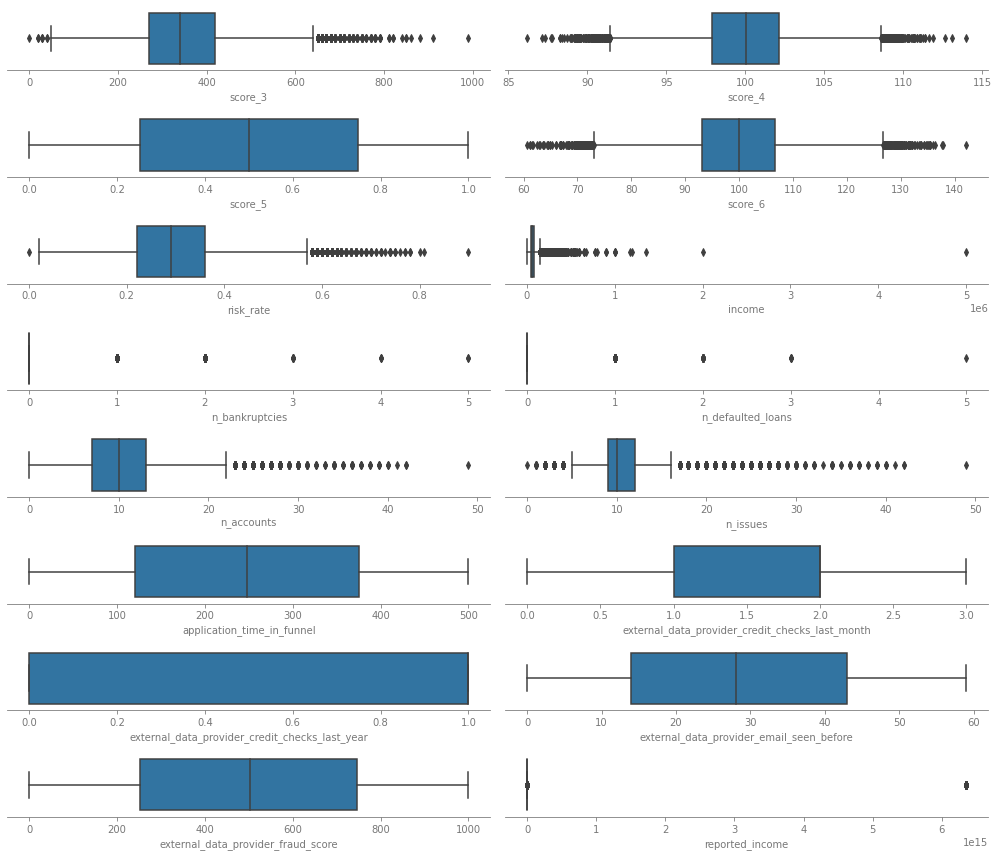

In [14]:
#14 Armazenando as features numéricas
num_feature = var_df_clean['feature'].loc[ (var_df_clean['Tipo'] == 'float64') ].to_list()

#Contador
cont_x = 0
cont_y = 0

#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False,
             'axes.spines.left': False, 
             'ytick.left': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12
             }

#Aplicando os parâmetros no matplotlib/seaborn
with plt.rc_context(rc_params):

  #Instanciando a figure e axes
  fig, ax = plt.subplots(nrows = 8, ncols = 2, figsize = (14,12) )

  #Rodando loop entre as features numéricas
  for feature in num_feature:

    #Criando o Box Plot para as features
    sns.boxplot(x = feature, data = df_clean, ax = ax[cont_x,cont_y])

    #Atualizando os valores dos contadores para o axes
    if cont_y == 1:
      cont_x = cont_x + 1
      cont_y = 0

    else :
      cont_y = cont_y + 1

  #Imprimindo os gráficos
  fig.tight_layout()

A partir do Boxplot é possível notar a presença de outliers em algumas features. Porém, não iremos aplicar o método de IQR score para retirar estas anomalias em variáveis como **score**, **risk_rate** e entre outras que podem enfraquecer nosso modelo de machine learning em casos reais.
Portanto, iremos aplicar o método apenas nas variáveis: **income**, **reported_income**, **n_accounts** e **n_issue**.

In [15]:
#15 Armazenando as features para utilizar o método IQR Score
feature_IQR = ['income',
               'reported_income',
               'n_accounts',
               'n_issues']

#Loop em relação as features
for feature in feature_IQR:

  Q1 = df_clean[feature].quantile(q = 0.25) #Definindo o primeiro quartil
  Q3 = df_clean[feature].quantile(q = 0.75) #Definindo o segundo quartil
  IQR = Q3 - Q1 #Definindo o interquartil
  Limite_Superior = Q3 + IQR #Definindo o Limite Superior
  Limite_Inferior = Q1 - IQR #Definindo o Limite Inferior

  #Eliminando os outliers acima do limite superior
  df_clean.drop( df_clean.loc[ df_clean[feature] > Limite_Superior ].index, axis = 0, inplace = True )

  #Eliminando os outliers abaixo do limite inferior
  df_clean.drop( df_clean.loc[ df_clean[feature] < Limite_Inferior ].index, axis = 0, inplace = True )

### Feature Engineering
Nesta etapa, vamos buscar alternativas para criar variáveis para aumentar o repertório durante a modelagem em busca de uma maior robustez.


#### Variável **application_time_applied**

Esta variável está no formato de "hh:mm:ss" e vamos utilizar apenas a parcela associadas a horas para facilitar a modelagem.
Vale destacar que esta variável está classificada como string ao invés de datetime, portanto, será convertida para inteiro após o tratamento mencionado.

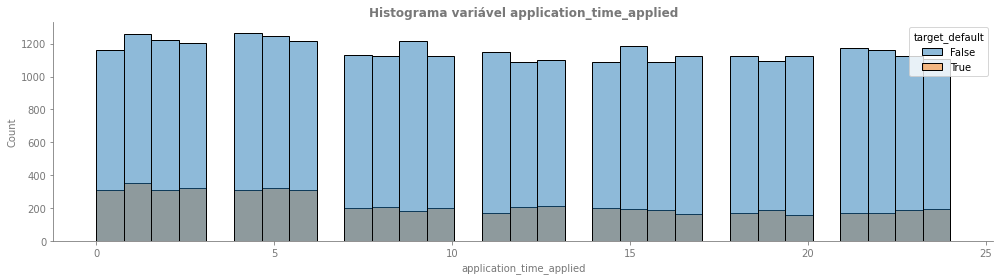

In [16]:
#16 Considerando apenas a hora e convertendo para inteiro
df_clean['application_time_applied'] = df_clean['application_time_applied'].str[:2].astype('int64')

#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12
             }

#Aplicando os parâmetros no matplotlib/seaborn
with plt.rc_context(rc_params):

  #Instanciando o objeto figure e axes
  fig, ax = plt.subplots( figsize = (14,4) )

  #Criando um histograma para a variável tenure
  sns.histplot(data = df_clean, x = 'application_time_applied', ax = ax, hue = "target_default")

  #Setando o título do gráfico
  ax.set_title("Histograma variável application_time_applied")

  #Exibindo o gráfico
  plt.tight_layout()

Como podemos observar as aplicações realizadas no período de 0 a 6 h possuem maior probabilidade de terem inadimplência.

#### Variável **profile_tags**

A instituição bancária atribui algumas Tags para os clientes e os armazena como um dicionário na variável **profile_tags**. Apesar de não sabermos os significado das Tags, podem ter um nível de significância para a predição do modelo de machine learning. Portanto, faremos um tratamento para extrair tais informações e criar colunas associadas a cada Tag.

Antes de iniciarmos este processo, temos que extrair as Tags do dicionário.

In [17]:
#17 Retirando o padrão dicionário
df_clean['profile_tags'] = df_clean['profile_tags'].str.extract('\[(.*)\]')

#Retirando as aspas e vírgulas
df_clean['profile_tags'] = df_clean['profile_tags'].str.replace("'","").str.replace(",","").str.replace("+","")

#Imprimindo as 5 primeiras linhas
df_clean.head()
     


,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,reason,income,...,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,profile_tags,user_agent
1,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,...,gmail.com,1.0,0.0,17.0,243.0,Radio-commercial,4902.0,BR-RS,n6 n7 nim,Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...
2,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,...,gmail.com,2.0,1.0,9.0,65.0,Waiting-list,163679.0,BR-RR,n0 n17 nim da,Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...
4,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,...,gmail.com,2.0,1.0,46.0,320.0,Invite-email,198618.0,BR-MT,proaty n19 da b19,Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...
5,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,300.0,101.837040,0.915389,90.711273,0.44,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,75024.28,...,gmail.com,2.0,1.0,21.0,811.0,Website,160198.0,BR-SP,c1 n3 n9,Mozilla/5.0 (Linux; Android 6.0.1; Nexus 6P Bu...
6,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,250.0,98.958914,0.901736,108.609675,0.43,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,49234.65,...,gmail.com,2.0,0.0,16.0,527.0,Twitter,132928.0,BR-SP,n3,Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like M...


O próximo passo é colocar as Tags em colunas, utilizando o algoritmo CountVectorizer do Scikit-learn. Este algoritmo serve para contar a quantidade de vezes que uma palavra aparece em um texto. Porém, para atender ao objetivo proposto, utilizaremos o argumento chamado binary que retorna 1 para caso a palavra esteja no texto e 0 para o contrário.

In [18]:
#18 Setando o algoritmo
bag_of_words = CountVectorizer(binary=True, analyzer='word')

#Treinando o algoritmo
words = bag_of_words.fit_transform(df_clean['profile_tags']).todense()

#Criando um dataframe a partir da matriz criada
df_tag = pd.DataFrame(words, columns = bag_of_words.get_feature_names(), index = df_clean.index)

#Imprmindo o dataframe
df_tag.head()

,a15,aty,b19,c1,c55,da,dfa,n0,n1,n10,...,n2,n3,n4,n5,n6,n7,n8,n9,nim,proaty
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
2,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


O próximo passo é excluirmos a variável **profile_tags** e juntar o dataframe com o da base de dados de inadimplência

In [19]:
#19 Unindo os dataframes
df_clean_novo = pd.concat([df_clean, df_tag], axis = 1)

#Excluindo a variável profile_tags
df_clean_novo.drop(labels = ['profile_tags'], axis = 1, inplace = True)

#### Variável **Reason**

Vamos avaliar se conseguimos agrupar os valores da reason por frequência de ocorrência. 

In [20]:
#20 Avaliando o % de frequência dos atributos da reason
df_clean_novo['reason'].value_counts()/df_clean_novo.shape[0]

mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIXuusuYraWV4rGB3v/7WqHKeKq5W600DOWmwjMTqsrAW    0.094208
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIXuusuYraWV4rGB3v/7WqHIRsMoD5e3RXcnWOgQJkT1p    0.066555
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIW76/BS2rZFHqQxXY+8F9NKu9aZ57vT61+K2XFrHtvT9    0.032756
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiH9ooDQPWyPZgJWyjKkQUjr    0.021653
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIRd8GOItgxlRAUGKcWd5xXCeKq5W600DOWmwjMTqsrAW    0.020117
                                                                                                                                      ...   
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhawTDCpMsk4XUB1fJAd0y16F8+s6Ffnrl9cJ0ztidq7VhY5UTFMpwiX08A/Dlu1ji    0.000029
mLVIVxoGY7TUD

Vamos criar uma variável em que atribuiremos o valor 1 para as os atributos acima de 2% de frequência e o valor 0 para caso a condição não seja atendida.

In [21]:
#21 Armazenando os % em um dicionário
dict_reason = (df_clean_novo['reason'].value_counts()/df_clean_novo.shape[0]).to_dict()

#Criando uma nova variável
df_clean_novo['mais_freq'] = df_clean_novo['reason'].apply(lambda x: 1 if dict_reason[x] > 0.02 else 0)

Após a criação, o próximo passo é excluirmos a variável **reason** do dataset.

In [22]:
#22 Excluindo a variável reason do dataset
df_clean_novo.drop(labels = ['reason'], axis = 1, inplace = True)

#### Variável **user_agent**


Esta variável armazena os dados do sistema operacional do usuário que está sendo utilizado para fazer aplicação. Portanto, vamos criar uma função para extrair o sistema operacional do usuário em meio a um conjunto de caracteres.

In [23]:
#23 Lista de sistema para buscar
def DefinirSO(string):


  Lista_SO = ['android',
              'iphone',
              'ubuntu',
              'windows',
              'macintosh']

  #Variável para armazenar o resultado
  result = ""

  #passando a string para minúsculo
  string_lower = string.lower()

  #Roda um loop em relação a lista
  for so in Lista_SO:

    #Verifica se o sistema está contido no conjunto de caracteres
    if so in string_lower:

      #Armazena o sistema
      result = so
  
  #Retorna o resultado da busca
  if result == "":
    return "Outro"
  else:
    return result

Vamos criar uma variável para armazenar o sistema operacional.

In [24]:
#24 Criando a variável
df_clean_novo['SO'] = df_clean_novo['user_agent'].apply(DefinirSO)

O próximo passo é excluirmos a variável **user_agent**.

In [25]:
#25 Excluindo a variável
df_clean_novo.drop( labels = ['user_agent'], axis = 1, inplace = True )

#### Variável **shipping_state**

Vamos agrupar esta variável por região para reduzir a complexidade do modelo, eliminando a necessidade de criar uma variável por estado brasileiro.

In [26]:
#26 Dicionário de estado por região
dict_regiao = {'BR-RS' : 'Sul', 
               'BR-RR': 'Norte', 
               'BR-MT': 'Centro-Oeste', 
               'BR-SP': 'Sudeste', 
               'BR-AC': 'Norte', 
               'BR-MS': 'Centro-Oeste', 
               'BR-PE': 'Nordeste',
               'BR-AM': 'Norte', 
               'BR-CE': 'Nordeste', 
               'BR-AP': 'Norte', 
               'BR-MA': 'Nosdeste', 
               'BR-BA': 'Nordeste', 
               'BR-TO': 'Norte', 
               'BR-RO': 'Norte',
               'BR-GO': 'Centro-Oeste', 
               'BR-SE': 'Nordeste', 
               'BR-RN': 'Nordeste', 
               'BR-MG': 'Sudeste', 
               'BR-ES': 'Sudeste', 
               'BR-PR': 'Sul', 
               'BR-DF': 'Centro-Oeste',
               'BR-SC': 'Sul', 
               'BR-PA': 'Norte', 
               'BR-AL': 'Nordeste', 
               'BR-PB': 'Nordeste'}

In [27]:
#27 Criando uma variável por região
df_clean_novo['regiao'] = df_clean_novo['shipping_state'].apply(lambda x: dict_regiao[x])

Vamos eliminar a variável **shipping_state** do dataset.

In [28]:
#28 Eliminando a variável shipping_state
df_clean_novo.drop(labels = ['shipping_state'], axis = 1, inplace = True)

### Dados Balanceados?
Este passo tem a finalidade de avarliarmos se os dados estão balanceados em relação a variável alvo (target_default)

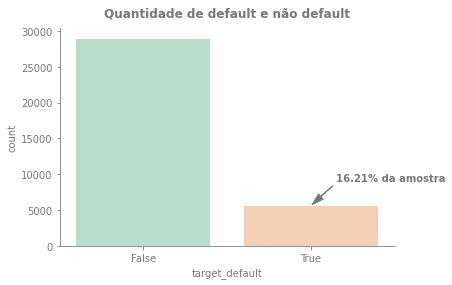

In [29]:
#29 Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12,
             'axes.titlepad': 12
             }

#setando os parâmetros no matplotlib
with plt.rc_context(rc_params):

  #Instanciando a Figure e Axes
  fig, ax = plt.subplots()

  #Criando o gráfico de countplot
  sns.countplot(x = 'target_default', 
                data = df_clean_novo,
                ax = ax,
                palette = "Pastel2")
  
  #Exibindo o título
  ax.set_title("Quantidade de default e não default")

  #Armazena o % da amostra
  percentual_default = round((df_clean_novo['target_default'].value_counts()[1] / df_clean_novo.shape[0])*100,2)

  #Criar uma informação no gráfico
  ax.annotate(str(percentual_default) + "% da amostra", 
              xy = (1, df_clean_novo['target_default'].value_counts()[1]), 
              xytext = (25,25), 
              color = "#787878",
              weight = 'bold', 
              textcoords='offset points',
              arrowprops=dict(color = '#787878',  shrink= 0.05, width = 0.01, headwidth = 7))

  #Exibindo o gráfico
  plt.show()

Como mostrado no gráfico, os dados relacionados com a variável alvo **target_default** está desbalanceada, visto que apenas 16,21% dos dados totais estão relacionados com inadimplência.

Isto gera um problema durante a predição do modelo de machine learning, porque é mais cômodo para o algoritmo classificar a maioria dos casos como no default. Diante disto, será necessário balancear amostra. Este passo será mostrado e explicado durante a fase de preparação dos dados.

## Modelo de Machine Learning

Antes de iniciarmos qualquer processo para avaliar o melhor modelo de machine learning para o problema envolvendo inadimplência, temos que realizar uma preparação dos dados.

#### Preparação dos dados

Nesta fase iremos preparar os dados para permitir que possamos aplicar os variados modelos de machine learning. Portanto, o primeiro passo é transformar as variáveis categóricas em valores numéricos.

Para isso, utilizaremos **LabelEncoder** da biblioteca do Scikit-Learn para transformar as variáveis binárias em valores de 0 e 1. Enquanto, para as variáveis que são categóricas e não binárias, utilizaremos o método **get_dummies** do Pandas que funciona de forma similar ao OneHotEncoder do Scikit-Learn com algumas facilidades para agilizar o processo.

Antes de iniciar este processo, vamos armazenar o nome das variáveis categóricas, binárias e numéricas em uma lista. Esta etapa facilitará tanto o processo de codificação quanto posteriormente quando aplicaremos a técnica de scaling feature nas variáveis numéricas.

Vale destacar que este processo não será realizado para as variáveis oriundas das features **profile_tags** e **reason**, já que as mesmas se encontram tratadas e transformadas em numéricas.

In [30]:
#30 Lista de variáveis numéricas
var_num = ['score_3', 
           'score_4', 
           'score_5', 
           'score_6', 
           'risk_rate', 
           'income',
           #'n_defaulted_loans', 
           'n_accounts',
           'n_issues', 
           'application_time_applied', 
           'application_time_in_funnel', 
           'external_data_provider_credit_checks_last_month',
           'external_data_provider_credit_checks_last_year',
           'external_data_provider_email_seen_before',
           'external_data_provider_fraud_score', 
           'reported_income']

#Lista de variáveis binárias (LabelEncoder)
var_bin = ['target_default', 
           'facebook_profile']

#Lista de variáveis categóricas (getdummies)
var_cat = ['score_1', 
           'score_2', 
           'state', 
           'real_state', 
           'email', 
           'marketing_channel', 
           'SO', 
           'regiao']

In [31]:
#31 Vamos copiar o dataframe
df_trat = df_clean_novo.copy()

#Instanciando o objeto labelEncoder
le = LabelEncoder()

#Criando um loop para codificar as variáveis binárias
for feature in var_bin:

  #transformando os valores binários em numéricos
  df_trat[feature] = le.fit_transform(df_trat[feature])

#Aplicando o get_dummies nas variáveis categóricas
df_trat = pd.get_dummies(data = df_trat, columns = var_cat)

Vamos avaliar as 5 primeiras linhas para verificar como ficaram as codificações.

In [32]:
#32 Imprimindo as 5 primeiras linhas
df_trat.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,income,facebook_profile,n_bankruptcies,n_defaulted_loans,...,SO_iphone,SO_macintosh,SO_ubuntu,SO_windows,regiao_Centro-Oeste,regiao_Nordeste,regiao_Norte,regiao_Nosdeste,regiao_Sudeste,regiao_Sul
1,0,370.0,97.062615,0.942655,92.002546,0.24,100018.91,0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,1,360.0,100.027073,0.351918,112.892453,0.29,65023.65,0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,0,500.0,98.474289,0.532539,118.126207,0.18,60011.29,1,0.0,0.0,...,0,0,0,0,1,0,0,0,0,0
5,0,300.0,101.837040,0.915389,90.711273,0.44,75024.28,0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
6,0,250.0,98.958914,0.901736,108.609675,0.43,49234.65,0,0.0,0.0,...,1,0,0,0,0,0,0,0,1,0


O próximo passo é dividirmos a base de dados entre treino e teste. Este passo é importante para ajustarmos os modelos de machine learning com base no dataset de treino, escolher o melhor modelo com base na sua performance e fazer todas as otimizações necessárias para que no final possamos validar o nível de generalização do modelo com base em dados desconhecidos (teste).

Além disso, para podermos dividir os dados em treino e teste, precisamos definir os valores de X (variáveis independentes) e y (target_default - variável alvo).


In [33]:
#33 Definindo os valores de X e y
X = df_trat.drop(['target_default'], axis = 1)
y = df_trat['target_default']

#Dividindo o dataset em treino e test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    shuffle = True, 
                                                    stratify = y,
                                                    random_state = 42)

O próximo passo é balancear os dados para evitar que a predição fique enviesada e limite a capacidade do modelo em generalizar.

Esta etapa pode ser feita por duas maneiras, conforme indicado por [Carlos Melo](https://sigmoidal.ai/como-lidar-com-dados-desbalanceados/):

>* Over-sampling: cria novas observações da classe minoritária a partir das informações contidas nos dados originais. Essa geração de novas entradas pode ser feita aleatoriamente com o auxílio de técnicas de clustering ou sinteticamente.
* Under-sampling: reduz o desbalanceamento do dataset focando na classe majoritária. Ou seja, elimina aleatoriamente entradas da classe com maior número de ocorrências.

Utilizaremos como base a técnica de **under-sampling**, devido a possibilidade de mantermos integralmente os dados originais associados a **target_default**.

In [34]:
#34 Instanciando o objeto RandomUnderSampler()
rus = RandomUnderSampler(random_state = 0)

#Balanceando a amostra
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

#Transformando o array X em dataframe e y em série
X_train_rus = pd.DataFrame(X_train_rus, columns = X_train.columns)
y_train_rus = pd.Series(y_train_rus)

#### Escolha do Melhor Modelo

Com as preparações dos dados, é possível aplicar os variados modelos de machine learning em busca daquele que atende a melhor métrica de avaliação para este problema.

Portanto, a métrica de avaliação escolhida para definir a melhor modelo de acordo com a performance no dataset de validação é a **ROC_AUC**, porque para este problema queremos que o modelo tenha uma boa capacidade de separabilidade entre as classes.

Utilizaremos os seguintes modelos para ajuste e análise:

* Regressão Logística
* Random Forest
* SVC
* KNN
* XGBoost
* LighGBM

O próximo passo é escolhermos o melhor modelo com base na métrica ROC_AUC. Para isto, utilizaremos uma validação cruzada.

Antes de iniciarmos este processo, vamos instanciar e definir os parâmetros do Kfold para validação cruzada e criar um passo dentro do pipeline que com o intuito de padronizar as variáveis numéricas durante o processo de treino na validação cruzada. 

Vale destacar que é recomendado padronizar apenas as variáveis numéricas para trazer os valores para uma escala padrão, já que alguns modelos de machine learning baseados em distância e gradiente não funcionam de forma adequada para valores com escalas muitos diferentes, podendo gerar um erro na predição.

In [35]:
#35 Instanciando os parâmetros do Kfold para Validação Cruzada
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 42)

In [36]:
#36 Escalonando as variáveis numéricas
num_scaled = ColumnTransformer([("Padronizar", StandardScaler(), var_num)],
                         remainder='passthrough')

O próximo passo é aplicarmos a validação cruzada para armazenar a performance de cada modelo.

In [37]:
#37 Importando os modelos
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Criando uma lista vazia para armazenar os valores das métricas e o nome do modelo
name_model = []
accuracy = []

#Instanaciando os modelos com os hiperparâmetros otimizados
model_rl = LogisticRegression(random_state = 42)

model_rf = RandomForestClassifier(random_state = 42)

model_svc = SVC(random_state = 42)

model_knn = KNeighborsClassifier()

model_xgb = XGBClassifier(random_state = 42)

model_lgbm = LGBMClassifier(random_state = 42)

#Criando um loop para aplicar o cross_validation em cada modelo e armazenar o resultado
for model in [model_rl, model_rf, model_svc, model_knn, model_xgb, model_lgbm]:

  #Criando um pipeline com a padronização + modelo
  pipe = make_pipeline(num_scaled, model)

  #Aplicando o cross_validation para calcular o score
  score = cross_val_score(estimator = pipe,
                          X = X_train_rus,
                          y = y_train_rus,
                          scoring = 'roc_auc',
                          cv = k_fold)
  
  #Armazenando o nome do modelo
  name_model.append(model.__class__.__name__)

  #Armazenando o score do modelo
  accuracy.append(score.mean())

#Convertendo a estrutura de lista para um dataframe
df_model = pd.DataFrame(data = accuracy, 
                        index = name_model, 
                        columns = ['ROC_AUC'])

#Imprmindo a tabela de resultado
df_model

,ROC_AUC
LogisticRegression,0.710501
RandomForestClassifier,0.687703
SVC,0.698035
KNeighborsClassifier,0.578471
XGBClassifier,0.709317
LGBMClassifier,0.696229


O modelo que teve a melhor performance foi Regressão Logística. 

#### Otimizando os Hiperparâmetros
O próximo passo é otimizar os hiperparâmetros de cada modelo, por isso, utilizaremos o algoritmo **GridSearchCV** do Scikit-Learn que visa escolher o melhor conjunto de hiperparâmetros a partir de uma validação cruzada.

Vale destacar que iremos focar em quatro hiperparâmetros de Regressão Logística:

* Penalidade;
* Grau da penalidade (C);
* Solver mais adequado para otimização do modelo para este problema.

In [38]:
#38 Definindo os passos da pipeline
pipe = make_pipeline(num_scaled, LogisticRegression(random_state = 42))

#Definindo os parâmetros para simulação do GridSearch
param_grid = {"logisticregression__penalty": ['l1', 'l2', 'elasticnet', 'none'],
              "logisticregression__C": [100, 10, 1, 0, 0.1, 0.01],
              "logisticregression__solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

#Instanciando o GridSearch
clf = GridSearchCV(estimator = pipe,
                   param_grid = param_grid,
                   scoring = 'roc_auc',
                   n_jobs = -1,
                   cv = k_fold)

#Ajustando com base no X_train e y_train balanceado
clf.fit(X = X_train_rus, 
        y = y_train_rus)

#Imprimindo o melhor parâmetro
clf.best_params_

{'logisticregression__C': 0.1,
 'logisticregression__penalty': 'l1',
 'logisticregression__solver': 'saga'}

De acordo com GridSearchCV, os parâmetros que mais se adequam ao modelo de Regressão Logística, levando em consideração as particularidades do problema, são:

* C = 0.1;
* Penalty = 'l1';
* Solver = 'Saga'

O próximo passo é avaliarmos se houve alguma mudança no score do modelo.

In [39]:
#39 Imprimindo o score dos melhores hiperparâmetros
clf.best_score_

0.71451649154048

O score ficou muito próximo do obtido na seção de escolha do melhor modelo.

#### Feature Selection

O próximo passo é selecionarmos as features que irão compor nosso modelo de machine learning, utilizando a Regressão Logística com os hiperparâmetros otimizados. Para isto, usaremos um algoritmo do Scikit-Learn chamado **SelectFromModel**. 

In [40]:
#40 Importando a biblioteca SelectFromModel
from sklearn.feature_selection import SelectFromModel

model_rl = LogisticRegression(C = 0.1,
                              penalty = 'l1',
                              solver = 'saga',
                              random_state = 42)

#Armazenar a quantidade de Ks features testadas em conjunto
k_val = []

#Armazenando o scores para cada Ks features testada em conjunto
score_val = []

#Loop para rodar as features em 2 e 2
for k in range(2, X_train_rus.shape[1], 2):

  #Instanciando o SelectFromModel
  selector = SelectFromModel(model_rl, 
                             max_features = k, 
                             threshold = -np.inf)
  
  #Treinando o SelectFromModel
  selector.fit(X_train_rus, y_train_rus)

  #Armazena as features escolhidas
  mask = X_train_rus.columns[selector.get_support()].to_list()

  #Selecionando as features escolhidas e criando um novo X_train
  X_train_rus_selector = X_train_rus[mask]
  
  #Criando um set para cada lista com o intuito de comparação
  s1 = set(mask)
  s2 = set(var_num)

  if (s1.intersection(s2) == set()):

    #Definindo os passos do pipeline
    pipe = make_pipeline(model_rl)
  
  else:

    #Padronizando as variáveis numéricas
    num_scaled = ColumnTransformer([("Padronizar", StandardScaler(), list(s1.intersection(s2)))],
                         remainder='passthrough')

    #Definindo os passos da pipeline
    pipe = make_pipeline(num_scaled, model_rl)

  #Aplicando o cross_validation para calcular o score
  score = cross_val_score(estimator = pipe,
                          X = X_train_rus_selector,
                          y = y_train_rus,
                          scoring = 'roc_auc',
                          cv = k_fold)
  
  #Armazenando k
  k_val.append(k)

  #Armazenando Score
  score_val.append(score.mean())

#Criando um dataframe
df_feature_selection = pd.DataFrame(data = score_val, index = k_val, columns = ['Score'])

O próximo passo é plotarmos um gráfico de linha em relação a quantidade de features escolhidas x score para buscarmos uma região estável ótima.

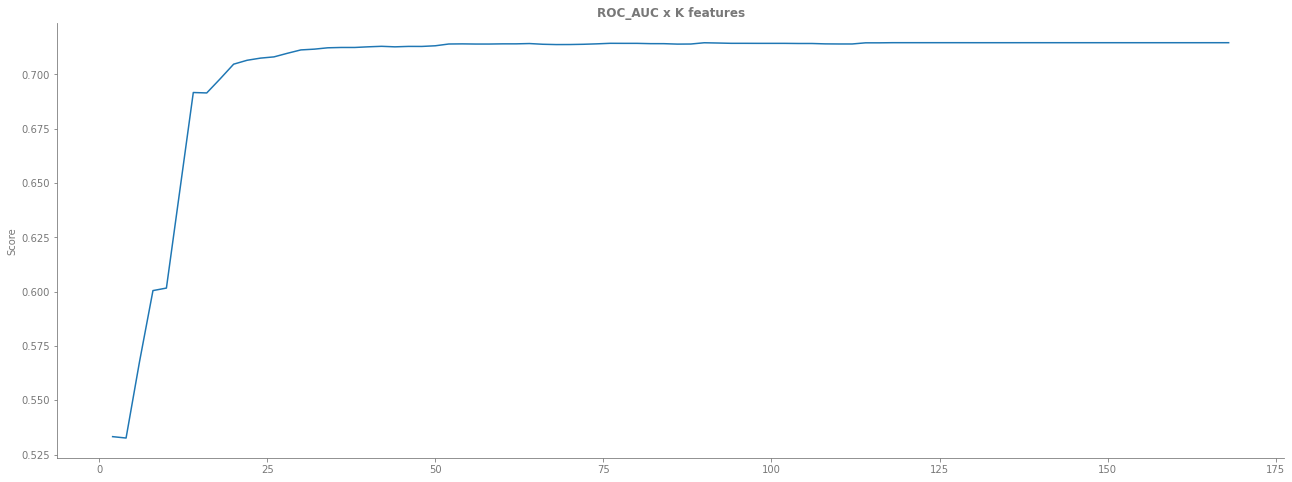

In [41]:
#41 Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12
             }

#Aplicando os parâmetros no matplotlib/seaborn
with plt.rc_context(rc_params):

  #instanciando o axes e figure do matplotlib
  fig, ax = plt.subplots(figsize = (22,8))

  #Construindo o gráfico 
  sns.lineplot(
                x = df_feature_selection.index.to_list(),
                y = df_feature_selection['Score'],
                ci = None,
                ax = ax,
              )
  
  #Colocando o título no gráfico
  ax.set_title("ROC_AUC x K features")

  #Exibindo o gráfico
  plt.show()

Podemos notar que mesmo variando o conjunto de features, o modelo obteve uma ROC_AUC próxima a alcançada na fase de otimização dos hyperparâmetros. Diante disto, vamos escolher uma região viável que tenha uma ROC_AUC estável e que reduza a quantidade de features do modelo para diminuir a complexidade.

Portanto, iremos utilizar as colunas escolhidas pelo algoritmo para a iteração do K = 90.

O próximo passo é verificar quais são estas colunas.

In [42]:
#42 Instanciando o SelectFromModel
selector = SelectFromModel(model_rl, 
                           max_features = 90, 
                           threshold = -np.inf)
  
#Treinando o SelectFromModel
selector.fit(X_train_rus, y_train_rus)

#Armazena as features escolhidas
mask = X_train_rus.columns[selector.get_support()].to_list()

#Imprimindo as colunas
mask

['score_3',
 'score_4',
 'score_5',
 'score_6',
 'risk_rate',
 'income',
 'facebook_profile',
 'n_accounts',
 'n_issues',
 'application_time_applied',
 'application_time_in_funnel',
 'external_data_provider_credit_checks_last_month',
 'external_data_provider_credit_checks_last_year',
 'external_data_provider_email_seen_before',
 'external_data_provider_fraud_score',
 'reported_income',
 'a15',
 'aty',
 'b19',
 'c55',
 'da',
 'dfa',
 'n1',
 'n14',
 'n16',
 'n2',
 'n3',
 'n4',
 'n6',
 'nim',
 'proaty',
 'mais_freq',
 'score_1_1Rk8w4Ucd5yR3KcqZzLdow==',
 'score_1_4DLlLW62jReXaqbPaHp1vQ==',
 'score_1_8k8UDR4Yx0qasAjkGrUZLw==',
 'score_1_DGCQep2AE5QRkNCshIAlFQ==',
 'score_1_e4NYDor1NOw6XKGE60AWFw==',
 'score_1_fyrlulOiZ+5hoFqLa6UbDQ==',
 'score_1_smzX0nxh5QlePvtVf6EAeg==',
 'score_2_+CxEO4w7jv3QPI/BQbyqAA==',
 'score_2_7h8PTkrlTWUPP3yuyP4rUg==',
 'score_2_A+QuW1n/ABeiVVe/9CRZ9Q==',
 'score_2_Fv28Bz0YRTVAT5kl1bAV6g==',
 'score_2_IOVu8au3ISbo6+zmfnYwMg==',
 'score_2_LCak332j+TYFqHC3NDwiqg==',

#### Otimização de Ponto de Corte

Nesta etapa buscaremos otimizar o valor de **Ponto de Corte**, ou seja, o valor limite que separa as predições em classes. As predições são dadas em forma de probabilidade e o valor limite é 0.5 como padrão. 

Como a métrica principal é a ROC_AUC e não leva em consideração o ponto de corte, devemos escolher outra métrica para buscarmos a sua otimização. Portanto, escolheremos a **f1_score** que é definida a partir de uma média harmônica entra recall e precision.

O objetivo desta etapa é encontrar o ponto de corte ótimo que maximize a métrica escolhida através de uma validação cruzada.

In [43]:
#43 Selecionando as features escolhidas e criando um novo X_train
X_train_rus_selector = X_train_rus[mask]

#Criando uma lista para armazenar os valores
score_medio = []
lista_cutoff = []

#Criando um loop
for cont in range(1, 98, 1):

  #Variando o ponto de corte
  cutoff = 0.01 + cont * 0.01

  #Criando uma variável para armazenar o score dos splits do K_fold
  score_cutoff = []

  #Loop nos index do k_fold
  for train_index, test_index in k_fold.split(X_train_rus_selector):

    #Seprando o treino e teste com base no index do K_fold
    X_train, X_test = X_train_rus_selector.loc[train_index], X_train_rus_selector.loc[test_index]
    y_train, y_test = y_train_rus.loc[train_index], y_train_rus.loc[test_index]

    #Instanciando o StandardScaler()
    scaler = StandardScaler()
    
    #Padronizando as variáveis numéricas
    for feature in list(s1.intersection(s2)):

      X_train[feature] = scaler.fit_transform(X_train[feature].values.reshape(-1,1))
      X_test[feature] = scaler.transform(X_test[feature].values.reshape(-1,1))
    
    #Fitando o modelo de regressão logística
    model_rl.fit(X = X_train, y = y_train)

    #Calculando a probabilidade de y nos dados de teste
    y_proba = model_rl.predict_proba(X_test)

    #Armazenando a probabilidade
    y_proba_df = pd.DataFrame(y_proba)

    #Definindo o valor de y de acordo com o ponto de corte
    y_proba_df['Predict'] = y_proba_df[1].apply(lambda x: 1 if x > cutoff else 0)

    #Calculando a métrica F1_Score com o ponto de corte utilizado
    score_cutoff.append(f1_score(y_test, y_proba_df['Predict']))

  #Armazenando os valores
  lista_cutoff.append(cutoff)
  score_medio.append(np.mean(score_cutoff))

In [44]:
#44 Criando um Dataframe
cutoff_df = pd.DataFrame(score_medio, index = lista_cutoff, columns = ['Cutoff'])

#Imprimindo o valor máx da métrica de F1_Score
cutoff_df.loc[cutoff_df['Cutoff'] == cutoff_df['Cutoff'].max()]

,Cutoff
0.35,0.698252


Como podemos observar o valor 0.35 de ponto de corte é o que maximiza o F1_Score. 

##Avaliando o Modelo Escolhido na Base de Validação

Avaliar a performance da base de validação

              precision    recall  f1-score   support

           0       0.73      0.16      0.27       827
           1       0.54      0.94      0.68       850

    accuracy                           0.56      1677
   macro avg       0.63      0.55      0.48      1677
weighted avg       0.63      0.56      0.48      1677

AUC Score:  0.6810157194679564
--------------------------------------------------------------------


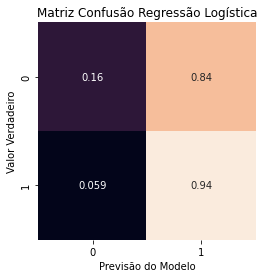

In [45]:
#45 Copiando o dataframe do X_train e X_test
X_train_rus_scaled = X_train_rus_selector.copy()
X_test_scaled = X_test[mask].copy()

#Padronizando as variáveis numéricas
for feature in list(s1.intersection(s2)):

  #Ajustando as variáveis numéricas do X_train
  X_train_rus_scaled[feature] = scaler.fit_transform(X_train_rus_scaled[feature].values.reshape(-1,1))

  #Ajustando as variáveis numéricas de X_test com os mesmos parâmetros do X_train
  X_test_scaled[feature] = scaler.transform(X_test_scaled[feature].values.reshape(-1,1))

#Treinando o modelo
model_rl.fit(X = X_train_rus_scaled, y = y_train_rus)

#Calculando a probabilidade y
y_proba = model_rl.predict_proba(X_test_scaled)

#Transformando em um dataframe
y_proba_df = pd.DataFrame(y_proba)

#Calculando a predição utilizando o cutoff de 0.51
y_proba_df['Predict'] = y_proba_df[1].apply(lambda x: 1 if x > 0.35 else 0)

# Classification Report
print(classification_report(y_test, y_proba_df['Predict']))

print("AUC Score: ",roc_auc_score(y_test, y_proba[:,1]))

print("--------------------------------------------------------------------")

#Instanciando a figure e axes
fig, ax = plt.subplots()

#Plotando a matriz de confusão em um heatmap
sns.heatmap(confusion_matrix(y_test, y_proba_df['Predict'], normalize = 'true'), 
            square=True, 
            annot=True, 
            cbar=False,
            ax = ax)

#Definindo o nome do eixo x
ax.set_xlabel("Previsão do Modelo")

#Definindo o nome do eixo y
ax.set_ylabel("Valor Verdadeiro")

#Definindo o título
ax.set_title("Matriz Confusão Regressão Logística")

#Exibindo a matriz de confusão
plt.show()

## Conclusão

O modelo de machine learning escolhido se baseou na métrica ROC_AUC com o intuito do modelo ter uma capacidade de separabilidade entre as classes.

Diante disto, o modelo que melhor se adequou foi a regressão logística, alcançando uma ROC_AUC na validação cruzada com todas as otimizações de 71%. 

Além disso, foi utilizado uma otimização de ponto de corte com base na métrica f1_Score, conseguindo maximizar o resultado para o valor de 70%, próximo ao obtido na fase de teste.

Vale destacar também que seu resultado no dataset de teste (68%) foi próximo ao de validação. Outro destaque foi o valor de precisão de casos negativos foi de 0.73. Com estas informações, é possível prever dentre aos novos dados de consumidores quais podem ser inadimplentes, podendo assim direcionar ações que busquem minimizar estas perdas. 
